<a href="https://colab.research.google.com/github/prithvi-diwanji/NLP2024_exercises/blob/main/8artificial_neuralnetwork_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#prithvidiwanji
#deep learning and neural network classwork
#29 May 2024


In [2]:
#name: SMSSpamCollection
#location: https://mitu.co.in/dataset

In [3]:
#import the libraries

In [4]:
pip install tensorflow

In [5]:
pip install keras

In [6]:
import pandas as pd
import seaborn as sns

In [7]:
#read the data - SMSSpamCollection - it is not a csv, it is tab separated, so rea as follows, and we give column names to it:

In [8]:
df= pd.read_csv("SMSSpamCollection", sep='\t',names=['label', 'text'] )

In [9]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
#same problem as earlier in macine learning nw we solve with deep learning with same data set

In [11]:
#pre processing is same as earlier - input and output data separatioon etc

In [12]:
#input data
x = df['text']
y=df ['label']

<Axes: xlabel='label', ylabel='count'>

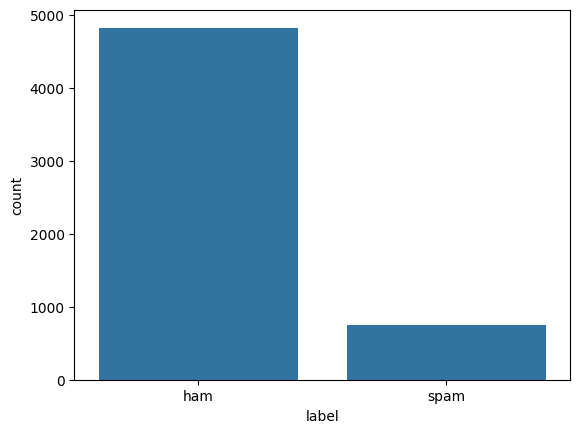

In [13]:
sns.countplot(x=y)

In [14]:
# smote can create missing data - either create or delete data  - imbalancelearn package
# class sensitive machine learning


In [15]:
#pip install imbalanced-learn

In [16]:
# prepare the data -clean etc

In [17]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
swords = stopwords.words('english')

In [19]:
#define cleantext function
def clean_text(sent):
  tokens1 = word_tokenize (sent)
  tokens2 = [x.lower() for x in tokens1 if x.isalpha()]
  tokens3 = [x for x in tokens2 if x not in swords]
  return tokens3

In [20]:
# now we see how to design the neural netowkr for this

In [21]:
new_sent = 'It was the expected result. They told me the same on fields.'

In [22]:
clean_text(new_sent) # clenaing done

['expected', 'result', 'told', 'fields']

In [23]:
#now vectorize the data- tf idf vectorization

In [24]:
#import the class
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
tfidf =  TfidfVectorizer(analyzer=clean_text)

In [26]:
#perform the operation
x_new=tfidf.fit_transform(x)

In [27]:
x_new.shape #x is our origianl huge data set - 7217nunique words, 5572 message  ham or spam??

(5572, 7217)

In [28]:
#essential extra step - y is prediction outcome variable it needs to be enocoded
# neuaral network needs number data
# so convert output to number

In [29]:
#encode the output variable

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
#create the object
le = LabelEncoder()

In [32]:
#apply the encoding to the output
y_new = le.fit_transform(y)

In [33]:
y_new

array([0, 0, 1, ..., 0, 0, 0])

In [34]:
le.classes_

array(['ham', 'spam'], dtype=object)

In [35]:
le.inverse_transform([1])

array(['spam'], dtype=object)

In [36]:
### now cross validation



In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, random_state=0)

In [39]:
x_train.shape

(4179, 7217)

In [40]:
x_test.shape

(1393, 7217)

Now build neural network here



In [41]:
#add layers and add objects to the layers

In [42]:
#load data, dfine model, compile model, fit model, evaluate, and tie it all tg

In [44]:
#model - add sequence of layers. here we usemodels in keras til we are hapy

In [45]:
#input layer has correct numer of inputs - number of features??
# input dimensions--?
# how to know the number of layers - trial and error

In [48]:
#Dense Class  - specify the nuber of neurons is the first object
#activation function - for internal layers RELU (+ - 0 forward to next layer) and
# chnge weights as features importane changes
# ideal weight wrt neurons?
#sigmoid to the output layer --binary classificaiton  - probability of outcome  = between 0 and 1

In [49]:
#define the neurla network model

In [51]:
from keras.models import Sequential
from keras.layers import Dense

In [73]:
#creste an object of the model - Sequential from keras
model = Sequential()
#add a layer of Dense
layer1 = Dense(64, input_shape=(7217,), activation='relu')
#add layer mnaually
model.add(layer1)
#add a second hidden layer of Dense
layer2 = Dense(128, activation='relu')
#add layer mnaually
model.add(layer2)
#create the output later, only one neuron  0 or 1
layer3 = Dense(1, activation ='sigmoid')
#number of neurons =number of classes
model.add(layer3)

In [74]:
#check summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                461952    
                                                                 
 dense_16 (Dense)            (None, 128)               8320      
                                                                 
 dense_17 (Dense)            (None, 1)                 129       
                                                                 
Total params: 470401 (1.79 MB)
Trainable params: 470401 (1.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
#### visualize the model


In [82]:
from keras.utils import plot_model

In [81]:
pip install pydot graphviz


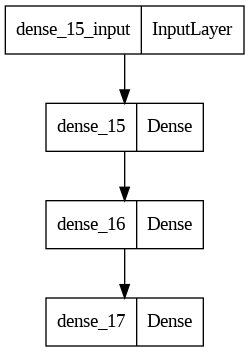

In [83]:
plot_model(model)

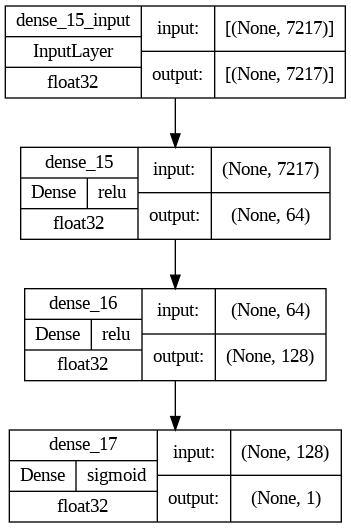

In [85]:
plot_model(model, show_dtype=True, show_layer_activations=True, show_layer_names=True, show_shapes=True)

In [86]:
#now cmpile the model  --tensorflow - theano et
#loss function, optimization function, accuracy of result
#need to be mentioned for the epochs

Compile the model

In [89]:
#compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#multi class : loss ='categorical_crossentropy'

Train the model - same method fit

In [91]:
model.fit(x_train.toarray(), y_train, epochs=10, batch_size=10)

Epoch 1/10
418/418 [==============================] - 11s 17ms/step - loss: 0.1952 - accuracy: 0.9292
Epoch 2/10
418/418 [==============================] - 8s 19ms/step - loss: 0.0276 - accuracy: 0.9916
Epoch 3/10
418/418 [==============================] - 4s 9ms/step - loss: 0.0063 - accuracy: 0.9993
Epoch 4/10
418/418 [==============================] - 3s 8ms/step - loss: 0.0023 - accuracy: 0.9995
Epoch 5/10
418/418 [==============================] - 4s 10ms/step - loss: 0.0015 - accuracy: 0.9998
Epoch 6/10
418/418 [==============================] - 4s 10ms/step - loss: 0.0014 - accuracy: 0.9998
Epoch 7/10
418/418 [==============================] - 4s 9ms/step - loss: 0.0013 - accuracy: 0.9998
Epoch 8/10
418/418 [==============================] - 3s 8ms/step - loss: 0.0013 - accuracy: 0.9998
Epoch 9/10
418/418 [==============================] - 5s 12ms/step - loss: 0.0012 - accuracy: 0.9998
Epoch 10/10
418/418 [==============================] - 4s 9ms/step - loss: 0.0013 - accuracy: 

In [92]:
#check accuracy above on the trng data

In [94]:
#evaluate hte model now on testing data

In [96]:
model.evaluate(x_test.toarray(), y_test, batch_size=1)

1393/1393 [==============================] - 8s 5ms/step - loss: 0.1188 - accuracy: 0.9677


[0.118779756128788, 0.9676955938339233]

In [97]:
#predict on unseen data - use new  - sample.csv

In [98]:
f =open('sample.csv')

In [99]:
new_data = f.readlines()

In [100]:
new_data

['Ok lar i double check wif da hair dresser already he said wun cut v short. He said will cut until i look nice.,,\n',
 'As a valued customer, I am pleased to advise you that following recent review of your Mob No. you are awarded with a £1500 Bonus Prize, call 09066364589\n',
 '"Today is ""song dedicated day.."" Which song will u dedicate for me? Send this to all ur valuable frnds but first rply me...",,\n']

In [101]:
#last layer has sigmoid activation function

In [103]:
#trasnsform above data into numerical
tfidf.transform(new_data)

<3x7217 sparse matrix of type '<class 'numpy.float64'>'
	with 39 stored elements in Compressed Sparse Row format>

In [104]:
#convert to array
tfidf.transform(new_data).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [106]:

model.predict(tfidf.transform(new_data).toarray())

1/1 [==============================] - 0s 134ms/step


array([[1.2359039e-09],
       [9.9999660e-01],
       [1.5873548e-04]], dtype=float32)

In [107]:
pred=model.predict(tfidf.transform(new_data).toarray())

1/1 [==============================] - 0s 42ms/step


In [108]:
pred[0]

array([1.2359039e-09], dtype=float32)

In [109]:
pred[1]

array([0.9999966], dtype=float32)

In [110]:
pred[2]

array([0.00015874], dtype=float32)

In [114]:
if pred[0] > 0.5:
  print(le.inverse_transform([1]))
else:
  print(le.inverse_transform([0]))

['ham']


In [115]:
if pred[1] > 0.5:
  print(le.inverse_transform([1]))
else:
  print(le.inverse_transform([0]))

['spam']
